# Homework 4: Modeling Text Data

### Team Member 1:
* UNI:  hsa2136
* Name: Husam Abdul-Kafi


You can find the data here: https://data.boston.gov/dataset/vision-zero-entry

# Task1 - Data Cleaning  [10 points]

Load the data, visualize the class distribution. Clean up the target labels. Some categories have been arbitrarily split and need to be consolidated. 

In [501]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, adjusted_rand_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation
import warnings

In [737]:
# Add your code for task 1 here. You may use multiple cells. 
data = pd.read_csv('data.csv')


In [738]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        "people have to cross too many lanes / too far"] = \
                        "it's too far / too many lanes to cross"
    data['REQUESTTYPE'][data['REQUESTTYPE']== 
                        '\" src=\"images/01 - Not enough time to cross.png\"></span>&nbsp;there\'s not enough time to cross the street'] = \
                        "it's too far / too many lanes to cross" 
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        "\" src=\"images/06 - Speeding.png\"></span>&nbsp;people speed"] = \
                        "people speed"
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        '" src="images/02 - Wait is too long.png"></span>&nbsp;the wait for the "Walk" signal is too long'] = \
                        'the wait for the "Walk" signal is too long'
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        '" src="images/14 - Other issue.png"></span>&nbsp;of something that is not listed here'] = \
                        'of something that is not listed here'
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        '" src="images/11 - Sidewalk issue.png"></span>&nbsp;sidewalks/ramps don\'t exist or need improvement'] = \
                        'sidewalks/ramps don\'t exist or need improvement'
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        '" src="images/10 - Hard to see.png"></span>&nbsp;it’s hard to see / low visibility'] = \
                        'it’s hard to see / low visibility'
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        '" src="images/12 - Bike facility issue.png"></span>&nbsp;the roadway surface needs improvement'] = \
                        "the roadway surface needs improvement"
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        'there are no bike facilities or they need maintenance'] = \
                        "bike facilities don't exist or need improvement"
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        'the roadway surface needs maintenance'] = \
                        "the roadway surface needs improvement"
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        'people have to wait too long for the "Walk" signal'] = \
                        'the wait for the "Walk" signal is too long'
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        'there are no sidewalks or they need maintenance'] = \
                        'sidewalks/ramps don\'t exist or need improvement'
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        'people are not given enough time to cross the street'] = \
                        'there\'s not enough time to cross the street'
    data['REQUESTTYPE'][data['REQUESTTYPE'] == 
                        'it’s hard for people to see each other'] = \
                        'it’s hard to see / low visibility'

In [739]:
data = data.drop_duplicates(["REQUESTTYPE", "COMMENTS"])
data = data.dropna(subset=['COMMENTS'])
data['REQUESTTYPE'].value_counts()

of something that is not listed here               1400
bike facilities don't exist or need improvement     817
people speed                                        742
people run red lights / stop signs                  649
people don't yield while turning                    452
people double park their vehicles                   420
it’s hard to see / low visibility                   411
sidewalks/ramps don't exist or need improvement     339
people don't yield while going straight             256
people cross away from the crosswalks               255
the roadway surface needs improvement               250
the wait for the "Walk" signal is too long          227
there's not enough time to cross the street         130
it's too far / too many lanes to cross              109
Name: REQUESTTYPE, dtype: int64

In [740]:
other_data = data[data['REQUESTTYPE'] == 'of something that is not listed here']

In [741]:
data = data[data['REQUESTTYPE'] != 'of something that is not listed here']

In [629]:
le=LabelEncoder()
data['REQUESTTYPE'] = le.fit_transform(data['REQUESTTYPE'])

(array([  926.,   411.,   255.,   256.,   452.,  1069.,   742.,   339.,
          250.,   357.]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ]),
 <a list of 10 Patch objects>)

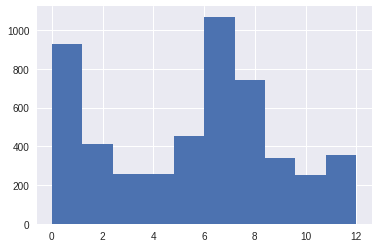

In [630]:
plt.hist(data['REQUESTTYPE'])

In [631]:
train,test = train_test_split(data[['REQUESTTYPE', 'COMMENTS']].as_matrix(), test_size=0.2)
train_X = train[:,1]
train_y = train[:,0].astype('float')
test_X  = test[:,1]
test_y  = test[:,0].astype('float')

# Task2 - Model 1 [10 points]

Run a baseline multi-class classification model using a bag-of-word approach, report macro f1-score (should be above .5) and visualize the confusion matrix. Can you interpret the mistakes made by the model? 

In [632]:
# Add your code for task 2 here. You may use multiple cells. 
count_vect = CountVectorizer()
train_X_counts = count_vect.fit_transform(train_X)


In [633]:
tfidf_transformer = TfidfTransformer()
train_X_tfidf = tfidf_transformer.fit_transform(train_X_counts)


In [634]:
clf = MultinomialNB().fit(train_X_tfidf, train_y)

In [635]:
test_X_counts = count_vect.transform(test_X)
test_X_tfidf  = tfidf_transformer.transform(test_X_counts)
predicted = clf.predict(test_X_tfidf)

In [636]:
np.unique(predicted, return_counts=True)

(array([  0.,   2.,   5.,   6.,   7.,   8.,   9.,  10.,  11.]),
 array([340,  31,  42,  55, 256, 275,   7,   2,   4]))

In [637]:
np.unique(test_y, return_counts=True)

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.]),
 array([156,  21,  89,  52,  60,  85,  84, 140, 152,  65,  41,  39,  28]))

In [638]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])

In [639]:
text_clf = text_clf.fit(train_X, train_y)

In [640]:
predicted = text_clf.predict(test_X)

In [641]:
np.unique(predicted, return_counts=True)

(array([  0.,   2.,   5.,   6.,   7.,   8.,   9.,  10.,  11.]),
 array([340,  31,  42,  55, 256, 275,   7,   2,   4]))

In [642]:
f1_score(test_y, predicted, average="macro")

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2991295609945811

In [643]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, n_iter=5, random_state=42)),])
parameters = {'vect__ngram_range': [(1, 1)],#, (1, 2), (1,3)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3, 1e-1, 1e-4),
}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=8)

In [644]:
gs_clf.fit(train_X, train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))]),
       fit_params={}, iid=True, n_jobs=8,
       param_grid={'tfidf__use_idf': (True, False), 'clf__alpha': (0.01, 0.001, 0.1, 0.0001), 'vect__ngram_range': [(1, 1)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [645]:
gs_clf.best_params_

{'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

In [646]:
predicted = gs_clf.predict(test_X)

In [647]:
np.unique(predicted, return_counts=True)

(array([  0.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.]),
 array([209, 102,  34,  20,  56,  95, 176, 165,  67,  32,  51,   5]))

In [648]:
np.mean(predicted == test_y)

0.66403162055335974

In [649]:
f1_score(test_y, predicted, average="macro")

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.55201370324903987

In [650]:
confusion_matrix(test_y, predicted)

array([[139,   0,   3,   0,   0,   0,   4,   1,   2,   4,   1,   2,   0],
       [  4,   0,   2,   0,   0,   3,   0,   1,   3,   3,   1,   4,   0],
       [  4,   0,  63,   0,   0,   1,   6,   3,   8,   2,   1,   1,   0],
       [  4,   0,   0,  28,   1,   0,   3,   5,   4,   4,   0,   3,   0],
       [  6,   0,  10,   1,  13,   6,   2,   9,  11,   1,   0,   1,   0],
       [  9,   0,  10,   1,   2,  34,   2,  12,   9,   2,   1,   3,   0],
       [  9,   0,   2,   0,   0,   0,  72,   0,   0,   1,   0,   0,   0],
       [  2,   0,   1,   1,   1,   0,   1, 119,  13,   0,   0,   2,   0],
       [ 10,   0,   4,   0,   3,   7,   2,  10, 111,   2,   1,   2,   0],
       [  9,   0,   0,   1,   0,   0,   2,   2,   2,  44,   1,   4,   0],
       [ 10,   0,   3,   1,   0,   0,   0,   1,   0,   1,  25,   0,   0],
       [  2,   0,   2,   0,   0,   1,   1,   9,   1,   2,   0,  20,   1],
       [  1,   0,   2,   1,   0,   4,   0,   4,   1,   1,   1,   9,   4]])

In [651]:
print(classification_report(test_y, predicted))

             precision    recall  f1-score   support

        0.0       0.67      0.89      0.76       156
        1.0       0.00      0.00      0.00        21
        2.0       0.62      0.71      0.66        89
        3.0       0.82      0.54      0.65        52
        4.0       0.65      0.22      0.33        60
        5.0       0.61      0.40      0.48        85
        6.0       0.76      0.86      0.80        84
        7.0       0.68      0.85      0.75       140
        8.0       0.67      0.73      0.70       152
        9.0       0.66      0.68      0.67        65
       10.0       0.78      0.61      0.68        41
       11.0       0.39      0.51      0.44        39
       12.0       0.80      0.14      0.24        28

avg / total       0.66      0.66      0.64      1012



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [653]:
df_cm = pd.DataFrame(confusion_matrix(test_y, predicted), index = range(0,13),
                  columns = range(0,13))

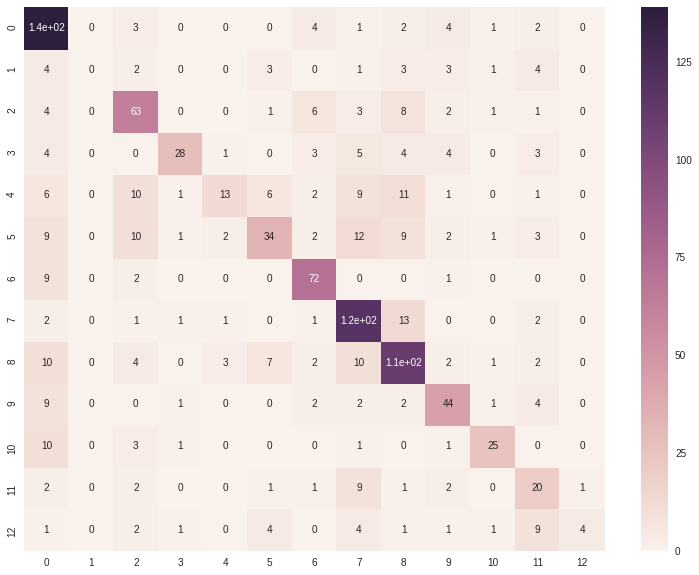

In [654]:
plt.figure(figsize = (13,10))
sn.heatmap(df_cm, annot=True)

# Task3 - Model 2 [30 points]

Improve the model using more complex text features, including n-grams, character n-grams and possibly domain-specific features.

### Stochastic Gradient Descent w/ n-grams

In [655]:
# Add your code for task 3 here. You may use multiple cells. 
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           n_iter=5, random_state=42)),])
parameters = {'vect__ngram_range': [(1, 2), (1,3), (1,4)],
#               'vect__stop_words': (None, "english"),
              'tfidf__use_idf': (True, False),
#               'vect__min_df': (1,2,3),
#               'vect__max_features': (None,3,4),
              'clf__alpha': (1e-2, 1e-3, 1e-1, 1e-4),
}
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=8)


In [656]:
gs_clf.fit(train_X, train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))]),
       fit_params={}, iid=True, n_jobs=8,
       param_grid={'tfidf__use_idf': (True, False), 'clf__alpha': (0.01, 0.001, 0.1, 0.0001), 'vect__ngram_range': [(1, 2), (1, 3), (1, 4)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [657]:
gs_clf.best_params_

{'clf__alpha': 0.0001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 3)}

In [658]:
predicted = gs_clf.predict(test_X)

In [659]:
np.mean(predicted == test_y)

0.69169960474308301

In [660]:
f1_score(test_y, predicted, average="macro")

0.60855868525686696

### Logistic Regression w/ n-grams

In [661]:
# Add your code for task 3 here. You may use multiple cells. 
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression()),])
parameters = {'vect__ngram_range': [(1, 2), (1,3), (1,4)],
#               'vect__stop_words': (None, "english"),
              'tfidf__use_idf': (True, False),
#               'vect__min_df': (1,2,3),
#               'vect__max_features': (None,3,4),
              'clf__class_weight': ['balanced', None],
              'clf__C': np.logspace(-3, 2, 6)
}
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=8)


In [662]:
gs_clf.fit(train_X, train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=8,
       param_grid={'tfidf__use_idf': (True, False), 'clf__class_weight': ['balanced', None], 'clf__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'vect__ngram_range': [(1, 2), (1, 3), (1, 4)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [663]:
gs_clf.best_params_

{'clf__C': 100.0,
 'clf__class_weight': None,
 'tfidf__use_idf': True,
 'vect__ngram_range': (1, 3)}

In [664]:
predicted = gs_clf.predict(test_X)

In [665]:
np.mean(predicted == test_y)

0.68675889328063244

In [666]:
f1_score(test_y, predicted, average="macro")

0.61437517068523917

# Task4 - Visualize Results [10 points]

Visualize results of the tuned model (classification results, confusion matrix, important features, example mistakes).

In [391]:
# Add your code for task 4 here. You may use multiple cells. 


In [668]:
df_cm = pd.DataFrame(confusion_matrix(test_y, predicted), index = range(0,13),
                  columns = range(0,13))

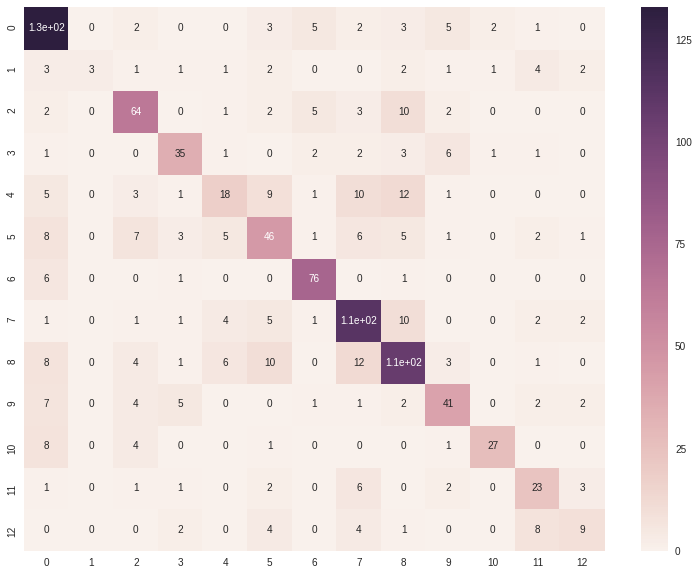

In [669]:
plt.figure(figsize = (13,10))
sn.heatmap(df_cm, annot=True)

In [670]:
print(classification_report(test_y, predicted))

             precision    recall  f1-score   support

        0.0       0.73      0.85      0.78       156
        1.0       1.00      0.14      0.25        21
        2.0       0.70      0.72      0.71        89
        3.0       0.69      0.67      0.68        52
        4.0       0.50      0.30      0.37        60
        5.0       0.55      0.54      0.54        85
        6.0       0.83      0.90      0.86        84
        7.0       0.71      0.81      0.76       140
        8.0       0.69      0.70      0.69       152
        9.0       0.65      0.63      0.64        65
       10.0       0.87      0.66      0.75        41
       11.0       0.52      0.59      0.55        39
       12.0       0.47      0.32      0.38        28

avg / total       0.69      0.69      0.68      1012



In [413]:
gs_clf.best_estimator_.steps[2][1].coef_

array([[-0.24370645, -0.02803455, -0.01477686, ..., -0.04146295,
        -0.08097439, -0.08097439],
       [-0.16533475, -0.0356613 , -0.02244552, ..., -0.03479055,
        -0.01407404, -0.01407404],
       [-0.17037122, -0.01695982, -0.01268725, ..., -0.03915281,
        -0.03243618, -0.03243618],
       ..., 
       [-0.17588459, -0.01864921, -0.02149174, ..., -0.04585397,
        -0.03057919, -0.03057919],
       [-0.13631394, -0.02063532, -0.00883359, ..., -0.01098559,
        -0.04926277, -0.04926277],
       [-0.11844567, -0.02911869, -0.00925345, ..., -0.02466827,
        -0.01231101, -0.01231101]])

In [671]:
count_vect = CountVectorizer(ngram_range=(1, 3))
train_X_counts = count_vect.fit_transform(train_X)
tfidf_transformer = TfidfTransformer(use_idf= True)
train_X_tfidf = tfidf_transformer.fit_transform(train_X_counts)
clf = LogisticRegression(C=100.0, class_weight=None)
clf.fit(train_X_tfidf, train_y)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [672]:
model = SelectFromModel(clf, prefit=True)
new_X = model.transform(train_X_tfidf)

# Task5 - Clustering [10 points]

Apply LDA, NMF and K-Means to the whole dataset. Can you find clusters or topics that match well with some of the ground truth labels? Use ARI to compare the methods and visualize topics and clusters.

### K-Means Clustering

In [675]:
# Add your code for task 5 here. You may use multiple cells.
X = data['COMMENTS'].as_matrix()
y = data['REQUESTTYPE'].as_matrix()

In [676]:
np.unique(y).shape

(13,)

In [677]:
km = KMeans(n_clusters=13, random_state=0, n_jobs=8, max_iter=500)

In [678]:
# count_vect = CountVectorizer(ngram_range=(1, 2))
# X_counts = count_vect.fit_transform(X)
tfidf_vect = TfidfVectorizer(use_idf= True, max_df=0.5, min_df=2, stop_words='english')
X_tfidf = tfidf_vect.fit_transform(X)


In [679]:
km.fit(X_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=13, n_init=10, n_jobs=8, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [680]:
np.unique(km.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32),
 array([ 311,  450,  229,  352,  275,  460,  310, 1446,  120,  220,  351,
         244,  289]))

In [681]:
np.unique(y, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([817, 109, 411, 255, 256, 452, 420, 649, 742, 339, 250, 227, 130]))

In [682]:
adjusted_rand_score(labels_pred=km.labels_, labels_true=y)

0.12665409327335392

### NMF Clustering

In [484]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [683]:
nmf = NMF(n_components=13, init='random', random_state=0)#, alpha=0.1, l1_ratio=0.5)

In [684]:
nmf.fit(X_tfidf)

NMF(alpha=0.0, beta=1, eta=0.1, init='random', l1_ratio=0.0, max_iter=200,
  n_components=13, nls_max_iter=2000, random_state=0, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

In [685]:
np.mean(nmf.components_, 0).shape
nmf.components_.shape

(13, 2915)

In [615]:
print_top_words(nmf, tfidf_vect.get_feature_names(), 10)

Topic #0:
cars parked coming hard turning difficult road bikes corner speeding
Topic #1:
speed high cut street road drivers limit area bumps children
Topic #2:
light red run lights green drivers running time turns pedestrian
Topic #3:
crosswalk pedestrians yield drivers don turning crossing ignore right crosswalks
Topic #4:
street way wrong drive fast narrow sidewalk wide sides road
Topic #5:
bike lanes facilities path needs need space sharrows road protected
Topic #6:
turn left right turning straight make turns arrow traffic ave
Topic #7:
walk cross signal long wait time pedestrians takes signals pedestrian
Topic #8:
intersection dangerous traffic block lights crosswalks confusing needs pedestrian crossing
Topic #9:
park double parking lot vehicles traffic parked sidewalk bus area
Topic #10:
stop sign signs bus stops run don drivers rarely needs
Topic #11:
lane bike right markings straight need drivers travel disappears road
Topic #12:
st washington ave need south traffic coming beaco

In [533]:
np.mean(X_tfidf)

0.00090941959556855559

In [544]:
np.max(nmf.components_)

2.99429188091649

In [686]:
preds = np.argmax(nmf.transform(X_tfidf), 1)

In [687]:
adjusted_rand_score(labels_pred=preds, labels_true=y)

0.13086165409287123

### Latent Dirichlet Allocation

In [688]:
lda = LatentDirichletAllocation(n_topics=10, max_iter=100, learning_method='batch',learning_offset=20.,random_state=0, n_jobs=8)



In [689]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')

In [690]:
tf = tf_vectorizer.fit_transform(X)

In [691]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=20.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_jobs=8, n_topics=10, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [695]:
preds = np.argmax(lda.transform(tf), 1)

In [696]:
adjusted_rand_score(labels_pred=preds, labels_true=y)

0.15996141342817782

In [692]:
print_top_words(lda, tf_vectorizer.get_feature_names(), 10)

Topic #0:
speed people street st cut traffic cars corner high area
Topic #1:
crosswalk pedestrians cross yield crossing people don drivers crosswalks street
Topic #2:
bike lane lanes traffic need road bikes dangerous facilities protected
Topic #3:
turn right left turning st ave cars drivers traffic intersection
Topic #4:
stop sign bus signs school way drivers intersection cars stops
Topic #5:
bike sidewalk lane path needs bridge street ramp walk pavement
Topic #6:
cars park double parking parked people street traffic lane vehicles
Topic #7:
light walk cross red people signal run time cars long
Topic #8:
street road cars way people fast hill drive dangerous speeding
Topic #9:
traffic rush hour st street narrow trucks cars use morning



# Task6 - Model 3 [30 points]

Improve the class definition for REQUESTTYPE by using the results of the clustering and results of the previous classification model. Re-assign labels using either the results of clustering or using keywords that you found during data exploration. The labels must be semantically meaningful.
The data has a large “other” category. Apply the topic modeling and clustering techniques to this subset of the data to find possible splits of this class.
Report accuracy using macro average f1 score (should be above .53) 


In [697]:
# Add your code for task 6 here. You may use multiple cells. 
preds = np.argmax(lda.transform(tf), 1)


In [705]:
preds[preds == 8] = 0

In [729]:
new_labels = np.empty(preds.shape[0],dtype='O')

In [733]:
new_labels[preds == 0] = "people speed"
new_labels[preds == 1] = "people cross away from the crosswalks"
new_labels[preds == 2] = "bike facilities don't exist or need improvement"
new_labels[preds == 3] = "people don't yield while turning"
new_labels[preds == 4] = "people run red lights / stop signs"
new_labels[preds == 5] = "sidewalks/ramps don't exist or need improvement"
new_labels[preds == 6] = "people double park their vehicles"
new_labels[preds == 7] = "the wait for the \"Walk\" signal is too long"
new_labels[preds == 9] = "too much traffic during rush hour"


In [736]:
new_labels

array(['people speed', 'the wait for the "Walk" signal is too long',
       'the wait for the "Walk" signal is too long', ...,
       'people double park their vehicles', 'people speed', 'people speed'], dtype=object)

In [746]:
other_comments = other_data['COMMENTS'].as_matrix()

In [747]:
tf_other = tf_vectorizer.transform(other_comments)

In [751]:
preds_other = np.argmax(lda.transform(tf_other), 1)

In [754]:
preds_other[preds_other == 8] = 0
new_labels_other = np.empty(preds_other.shape[0],dtype='O')
new_labels_other[preds_other == 0] = "people speed"
new_labels_other[preds_other == 1] = "people cross away from the crosswalks"
new_labels_other[preds_other == 2] = "bike facilities don't exist or need improvement"
new_labels_other[preds_other == 3] = "people don't yield while turning"
new_labels_other[preds_other == 4] = "people run red lights / stop signs"
new_labels_other[preds_other == 5] = "sidewalks/ramps don't exist or need improvement"
new_labels_other[preds_other == 6] = "people double park their vehicles"
new_labels_other[preds_other == 7] = "the wait for the \"Walk\" signal is too long"
new_labels_other[preds_other == 9] = "too much traffic during rush hour"


In [758]:
le=LabelEncoder()
new_labels_other = le.fit_transform(new_labels_other)

In [764]:
new_data = pd.DataFrame({"comments":other_comments, "labels":new_labels_other})

In [765]:
train,test = train_test_split(new_data.as_matrix(), test_size=0.2)

In [767]:
train_X = train[:,0]
train_y = train[:,1].astype('float')
test_X  = test[:,0]
test_y  = test[:,1].astype('float')

In [770]:
# Add your code for task 3 here. You may use multiple cells. 
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression()),])
parameters = {'vect__ngram_range': [(1, 2), (1,3), (1,4)],
#               'vect__stop_words': (None, "english"),
              'tfidf__use_idf': (True, False),
#               'vect__min_df': (1,2,3),
#               'vect__max_features': (None,3,4),
              'clf__class_weight': ['balanced', None],
              'clf__C': np.logspace(-3, 2, 6)
}
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=8)


In [772]:
gs_clf.fit(train_X, train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=8,
       param_grid={'tfidf__use_idf': (True, False), 'clf__class_weight': ['balanced', None], 'clf__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'vect__ngram_range': [(1, 2), (1, 3), (1, 4)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [776]:
gs_clf.best_params_

{'clf__C': 100.0,
 'clf__class_weight': None,
 'tfidf__use_idf': True,
 'vect__ngram_range': (1, 2)}

In [773]:
predicted = gs_clf.predict(test_X)

In [775]:
f1_score = f1_score(test_y, predicted, average="macro")

In [ ]:
print(f1_score)
assert(f1_score > .53)

# Extra Credit [Up to +20 points]

Use a word embedding representation like word2vec for step 3 and or step 6. 

In [7]:
# Add your code for extra credit here. You may use multiple cells. 



### Gradient Boosting w/ n-grams

In [389]:
# text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,4))),
#                      ('tfidf', TfidfTransformer(use_idf=True)),
#                      ('clf', XGBClassifier( learning_rate =0.1, n_estimators=140,
#                                          gamma=0, subsample=0.8, colsample_bytree=0.8,
#                                         objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=0)),])
# param_xgb = {
#     'clf__max_depth':range(3,10,2),
#     'clf__min_child_weight':range(1,6,2)
# }
# grid_xgb = GridSearchCV(text_clf, param_grid = param_xgb,n_jobs=1,iid=False, cv=5)

In [390]:
# grid_xgb.fit(train_X, train_y)
# print(grid_xgb.best_params_)

{'clf__max_depth': 5, 'clf__min_child_weight': 1}


In [395]:
# grid_xgb

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip...gistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8))]),
       fit_params={}, iid=False, n_jobs=1,
       param_grid={'clf__max_depth': range(3, 10, 2), 'clf__min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [392]:
# predicted = grid_xgb.predict(test_X)


In [393]:
# np.mean(predicted == test_y)

0.55263157894736847

In [394]:
# f1_score(test_y, predicted, average="macro")

0.50391595248178778